In [18]:
import pandas as pd
import numpy as np
import pprint as pp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
newyork = pd.read_csv("Data/Covid Data/newyork-covid19-cases-and-deaths.csv")
sanantonio = pd.read_csv("Data/Covid Data/san-antonio-covid19-cases-and-deaths.csv")
wisconsin = pd.read_csv("Data/Covid Data/wisconsin-covid19-cases-and-deaths.csv")
chicago = pd.read_csv("Chicago-Covid-SocioDemographics-Cases-Deaths.csv")
new_data = pd.read_csv("socio-demographic-and-death-counts.csv")
data = chicago.append(new_data).reset_index()
del data['index']

In [3]:
print("NY:", newyork.shape, "\n")
print("SanAnt:", sanantonio.shape, "\n")
print("Wisc:", wisconsin.shape, "\n")
print("Chi:", chicago.shape, "\n")
print("Combo:", data.shape, "\n")

NY: (177, 19) 

SanAnt: (66, 15) 

Wisc: (775, 90) 

Chi: (57, 54) 

Combo: (1051, 54) 



In [4]:
chicago.head()

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000)
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,14.76,14.11,1.67,0.68,66.31,2.47,184,2.148077,17196,200.751827
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,4.69,2.99,0.61,0.00,91.67,0.03,278,3.140711,24130,272.609162
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,42.45,11.93,0.98,0.00,44.29,0.34,130,3.063581,4235,99.802046
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,38.17,19.04,1.60,0.50,38.03,2.65,89,1.680609,11074,209.113054
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,1.55,2.46,0.89,0.00,94.89,0.21,182,2.858085,14030,220.323812


In [5]:
sanantonio.head()

,OBJECTID,ZIP_CODE,Positive,CasesP100000,ActiveCases,Deaths,ActiveCaseRate,DeathRate,CaseChange,CaseChangeRate,Equity_Score,OverallCoVIDScore,TotPop2021,SHAPE_Length,SHAPE_Area
0,1,78002,2712,29851.403412,148,21,88.057237,231.150248,-196,-73.408240,7,15,9085,0.427542,0.009546
1,4,78015,2407,17618.211096,168,11,58.556580,80.515298,-178,-74.476987,2,5,13662,0.278955,0.002312
2,5,78023,5907,20017.621743,527,41,91.497509,138.940662,-407,-73.333333,3,7,29509,0.886455,0.017922
3,12,78069,405,17059.814659,0,8,0.000000,336.983993,-4,-40.000000,8,15,2374,0.254859,0.002041
4,13,78073,3006,37678.616195,162,18,112.810228,225.620456,-357,-81.506849,8,15,7978,0.580798,0.011685


In [67]:
wisconsin.head()
(wisconsin.iloc[:,2]) = pd.to_numeric(wisconsin.iloc[:,2], errors="coerce").fillna(0).astype(np.int64)

wisconsin.iloc[:,2]

0      54403
1      54405
2      54406
3      54407
4      54408
       ...  
770    54540
771    54541
772    54542
773    54545
774    54546
Name: GEOName, Length: 775, dtype: int64

In [68]:
#pp.pprint(list(data.columns))
nyzip = list(newyork["MODIFIED_ZCTA"])
sazip = list(sanantonio["ZIP_CODE"])
wiszip = list(wisconsin["GEOName"])
chzip = list(chicago["Zipcode"])
data["state"] = 0

for row in range(0, data.shape[0]):
    z = data.iloc[row, 0]
    if z in nyzip:
        data.iloc[row,-1] = "NY"
    elif z in sazip:
        data.iloc[row,-1] = "TX"
    elif z in wiszip:
        data.iloc[row,-1] = "WI"
    elif z in chzip:
        data.iloc[row,-1] = "IL"
data.head()

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000),state
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,14.11,1.67,0.68,66.31,2.47,184,2.148077,17196,200.751827,IL
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,2.99,0.61,0.00,91.67,0.03,278,3.140711,24130,272.609162,IL
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,11.93,0.98,0.00,44.29,0.34,130,3.063581,4235,99.802046,IL
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,19.04,1.60,0.50,38.03,2.65,89,1.680609,11074,209.113054,IL
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,2.46,0.89,0.00,94.89,0.21,182,2.858085,14030,220.323812,IL


In [69]:
nydata = data.loc[data["state"] == "NY"]
sadata = data.loc[data["state"] == "TX"]
widata = data.loc[data["state"] == "WI"]
chdata = data.loc[data["state"] == "IL"]
unknown = data.loc[data["state"] == 0]

print(nydata.shape)
print(sadata.shape)
print(widata.shape)
print(chdata.shape)
print(unknown.shape)

data.iloc[:,0]

(175, 55)
(66, 55)
(753, 55)
(57, 55)
(0, 55)


0       60647
1       60639
2       60707
3       60622
4       60651
        ...  
1046    54540
1047    54541
1048    54542
1049    54545
1050    54546
Name: Zipcode, Length: 1051, dtype: int64

In [8]:
nycors = nydata.corr().abs()
nyhighcors = nycors[nycors>0.5]
nyfeature_importance = round(nyhighcors,2).dropna(subset=['Death Counts(Per 1000)'])['Death Counts(Per 1000)'].to_frame().reset_index()
nycors
nyfeature_importance

,index,Death Counts(Per 1000)
0,18 to 64(%),0.58
1,Per capita income (USD),0.62
2,Median household income (USD),0.65
3,Mean travel time to work (Minutes),0.62
4,Worked at home (%),0.51
5,Median housing value,0.53
6,Moved Since Prev Year(%),0.57
7,Same House Prev Year(%),0.57
8,High School(%),0.59
9,Some College(%),0.52


In [140]:
widata["LogDeaths"] = np.log(widata["Death Counts(Per 1000)"])
wicors = widata.corr().abs()
wihighcors = wicors[wicors>0.5]
wifeature_importance = round(wihighcors,2).dropna(subset=['LogDeaths'])['LogDeaths'].to_frame().reset_index()
wifeature_importance

C:\Users\fanta\anaconda3\envs\cs418env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\fanta\AppData\Local\Temp/ipykernel_5996/1230357870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  widata["LogDeaths"] = np.log(widata["Death Counts(Per 1000)"])


,index,LogDeaths
0,Death Counts(Per 1000),0.86
1,LogDeaths,1.00


In [10]:
txcors = sadata.corr().abs()
txhighcors = txcors[txcors>0.5]
txfeature_importance = round(txhighcors,2).dropna(subset=['Death Counts(Per 1000)'])['Death Counts(Per 1000)'].to_frame().reset_index()
txcors
txfeature_importance

,index,Death Counts(Per 1000)
0,White(%),0.58
1,Hispanic(%),0.62
2,Per capita income (USD),0.55
3,Median household income (USD),0.70
4,Below poverty line(%),0.67
5,Drove Alone (%),0.52
6,Public Transit (%),0.62
7,Walked (%),0.52
8,Worked at home (%),0.54
9,Married (%),0.63


In [258]:
datb = data.set_index('Zipcode')
print(np.shape(datb))
idx = np.r_[0:(np.shape(datb)[1] - 5), -1, -4]

print(idx)

datb = datb.loc[datb.loc[:,"Death Counts(Per 1000)"] != 0]


datc = datb.iloc[:,idx]

#datc = datc[datc.loc["Death Counts(Per 1000)"] != 0]

features = datc.iloc[:,:-1]

labels = datc.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

#datb.head()
X_train.head()




(1051, 54)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 -1 -4]


,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),Native(%),...,Bachelor's(%),Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),state
Zipcode,,,,,,,,,,,,,,,,,,,,,
54952,27182,39.3,21.98,61.89,16.13,48.75,51.25,82.58,1.69,0.96,...,17.57,8.23,5.06,8.58,39.56,1.38,0.0,46.69,3.78,WI
54864,1376,45.3,23.04,61.85,15.12,53.05,46.95,93.17,2.83,2.98,...,18.32,6.88,0.80,54.55,45.45,0.00,0.0,0.00,0.00,WI
11364,35866,44.8,19.94,60.12,19.94,49.25,50.75,30.78,2.40,0.71,...,27.36,17.17,42.26,6.22,78.57,1.48,0.0,13.28,0.45,NY
53555,8625,46.1,20.72,59.87,19.41,53.74,46.26,92.37,0.19,0.52,...,22.12,12.85,3.01,5.38,42.31,0.00,0.0,51.15,1.15,WI
54446,3080,33.7,32.50,54.45,13.05,49.03,50.97,95.23,0.06,0.13,...,10.24,3.32,1.85,21.05,0.00,0.00,0.0,75.44,3.51,WI


# PCA

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def scale_df(X):
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    return X_scaled

def PCA_2(X, random_state = 17):
    pca_2 = PCA(n_components = 2, random_state = random_state)
    X_scaled = scale_df(X)
    pca_2.fit(X_scaled)
    X_pca_2 = pca_2.transform(X_scaled)
    return pca_2, X_pca_2

def plot_pca(pca_data, pca_model, labels, title, cmap = "icefire"):
    pc1 = pca_data[:,0]
    pc2 = pca_data[:,1]
    plt.figure(figsize=(10,7))
    plt.scatter(x = pc1, y = pc2, s = 70,
                c = labels, cmap = cmap)
    sm = plt.cm.ScalarMappable(cmap = cmap,
                               norm = plt.Normalize(vmin = np.min(labels), 
                                                    vmax = np.max(labels)))
    sm._A = []
    cbar = plt.colorbar(sm)
    
    perc_explained = pca_model.explained_variance_ratio_*100
    expl_1 = round(perc_explained[0],2)
    expl_2 = round(perc_explained[1],2)
    
    plt.xlabel("PC 1 (" + str(expl_1) + "% of Variance)")
    plt.ylabel("PC 2 (" + str(expl_2) + "% of Variance)")
    plt.title(title)
    plt.show()
    
def plot_pca_cat_labeled(pca_data, pca_model, labels, title):
    pc1 = pca_data[:,0]
    pc2 = pca_data[:,1]
    #print(pc1, pc2)
    plt.figure(figsize=(10,7))
    plt.scatter(x = pc1, y = pc2, s = 70,
                c = cols, alpha = .65)

    
    perc_explained = pca_model.explained_variance_ratio_*100
    expl_1 = round(perc_explained[0],2)
    expl_2 = round(perc_explained[1],2)
    
    plt.xlabel("PC 1 (" + str(expl_1) + "% of Variance)")
    plt.ylabel("PC 2 (" + str(expl_2) + "% of Variance)")
    plt.title(title)
    for i in range(0, len(data.loc[:,"Zipcode"])):
        print(pc1[i])
        print(pc2[i])
        print(str(data.loc[:,"Zipcode"][i]))
        plt.text(pc1[i], pc2[i], str(data.loc[:,"Zipcode"][i]))
    plt.show()
    
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='NY':
            cols.append(1)
        elif l=='TX':
            cols.append(2)
        elif l=='WI':
            cols.append(3)
        elif l =='IL':
            cols.append(4)
        else:
            cols.append(5)
    return np.array(cols)
# Create the colors list using the function above
cols=pltcolor(X_train.loc[:,"state"])

def plot_pca_cat(pca_data, pca_model, labels, title):
    pc1 = pca_data[:,0]
    pc2 = pca_data[:,1]
    plt.figure(figsize=(10,7))
    plt.scatter(x = pc1, y = pc2, s = 70,
                c = cols, alpha = .65)

    
    perc_explained = pca_model.explained_variance_ratio_*100
    expl_1 = round(perc_explained[0],2)
    expl_2 = round(perc_explained[1],2)
    
    plt.xlabel("PC 1 (" + str(expl_1) + "% of Variance)")
    plt.ylabel("PC 2 (" + str(expl_2) + "% of Variance)")
    plt.title(title)
    

    plt.show()

In [42]:
#cols=pltcolor(data.loc[:,"state"])
type(cols)

numpy.ndarray

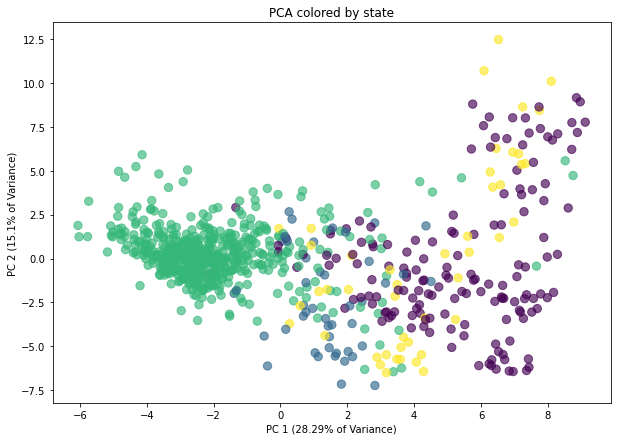

In [122]:
#data.head()
#data.loc[:,"Median age":"North America(%)"].head()
#data_scaled = scale_df(data)

Numeric_socdem = X_train.loc[:,"Median age":"North America(%)"]
scaled_data = scale_df(Numeric_socdem)

pca2, xpca2 = PCA_2(Numeric_socdem)

data.loc[:,"Death Counts(Per 1000)"]

plot_pca_cat(xpca2, pca2, cols, "PCA colored by state")


There is clearly a relationship between state and sociodemographics. The three big cities (NY, SA, Chicago) mostly overlap, however, most of the data from Wisconsin occupies its own area in the PC space. The green dots on the right side are zipcodes in Wisconsin's larger cities (Madison/Milwaukee).

ValueError: 'c' argument has 1051 elements, which is inconsistent with 'x' and 'y' with size 771.

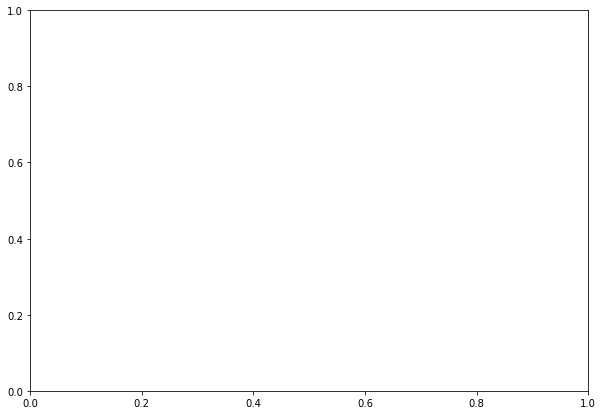

In [123]:
plot_pca(xpca2, pca2, data[data"Population"], "")


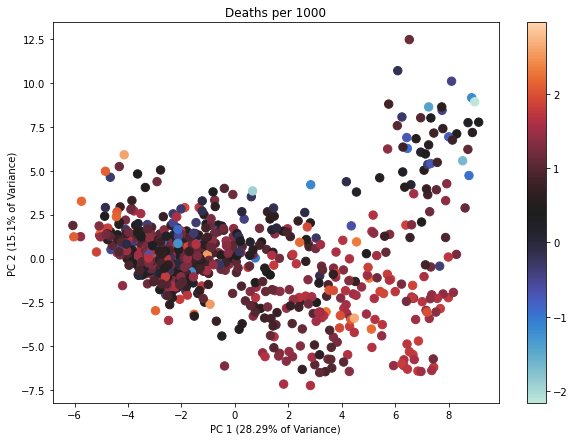

In [126]:
plot_pca(xpca2, pca2, np.log(y_train), "Deaths per 1000")

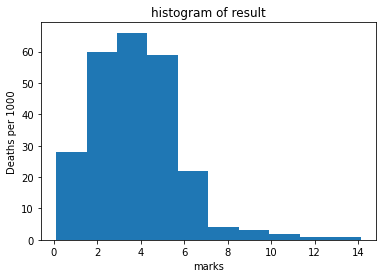

In [164]:
fig,ax = plt.subplots(1,1)

ax.hist((cityy_train))
ax.set_title("histogram of result")
ax.set_xlabel('marks')
ax.set_ylabel("Deaths per 1000")
plt.show()

logtrain = np.log(y_train)
logtest = np.log(y_test)

The lower population zipcodes are mostly on the left side of the plot, suggesting population size is correlated with many other sociodemographic variables.

In [259]:
import pandas as pd
from random_forest import *
from optimize_rfr_hyperparams2 import *

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(2, 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
bootstrap = [True]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

def optimize_rf2(train_features, train_labels, random_grid):
    rf = RandomForestRegressor(random_state = 0)
    rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 10, 
                               cv = RepeatedKFold(n_splits = 5, n_repeats = 5),
                               verbose = 100, random_state = 0, n_jobs = -1)
    rf_random.fit(train_features, train_labels)
                          
    return rf_random


#X_train.shape
#datc.head()
X_train.head()

def select_relevant(X):
    #return(X.loc[:,"Population":"North America(%)"])
    return(X.loc[:,"Median age":"North America(%)"])

X_train2 = select_relevant(X_train)
X_test2 = select_relevant(X_test)

X_train2.head()

top5 = np.percentile(y_train, 95)
top5
bottom5 = np.percentile(y_train, 5)

X_train_95 = X_train2[y_train <= top5]
y_train_95 = y_train[y_train <= top5]

X_test_95 = X_test2[y_test <= top5]
y_test_95 = y_test[y_test <= top5]


X_train_90 = X_train2[(y_train <= top5) & (y_train >= bottom5)]
y_train_90 = y_train[(y_train <= top5) & (y_train >= bottom5)]

X_test_90 = X_test2[(y_test <= top5) & (y_test >= bottom5)]
y_test_90 = y_test[(y_test <= top5) & (y_test >= bottom5)]

top5, bottom5
#X_test2.head()

(6.256794399464048, 0.0)

In [268]:
rf_model = rfr_default(X_train2, logtrain)

#Training error
train_error = abs(np.exp(rf_model.predict(X_train2)) - np.exp(logtrain))
test_error = abs(np.exp(rf_model.predict(select_relevant(X_test))) - np.exp(logtest))

print(np.mean(train_error))
print(np.mean(test_error))

ValueError: Found input variables with inconsistent numbers of samples: [840, 771]

In [260]:
rf_model = rfr_default(X_train_95, y_train_95)

#Training error
train_error = abs((rf_model.predict(X_train_95)) - (y_train_95))
test_error = abs((rf_model.predict(X_test_95)) - (y_test_95))

print(np.mean(train_error))
print(np.mean(test_error))

0.34140773449989753
0.9333560740626514


In [269]:
rf_model = rfr_default(X_train2, y_train)

#Training error
train_error = abs((rf_model.predict(X_train2)) - (y_train))
test_error = abs((rf_model.predict(X_test2)) - (y_test))

print(np.mean(train_error))
print(np.mean(test_error))

0.4413005543789704
1.1663062789855054


In [152]:
#Tune RF for for combined data
hyperparam_tuning = optimize_rf2(X_train2, logtrain, random_grid = random_grid)
0.49250617953153186
0.944364128660558

Fitting 25 folds for each of 10 candidates, totalling 250 fits


In [198]:
#params = (hyperparam_tuning.best_params_)

#params["n_estimators"] = 5000

#rf_model_optimized = rfr_custom(X_train2, logtrain, params)

#Training error
train_error = abs(np.exp(1.246*rf_model_optimized.predict(X_train2) - 0.22) - np.exp(logtrain))
test_error = abs(np.exp(1.246*rf_model_optimized.predict(select_relevant(X_test)) - 0.22) - np.exp(logtest))

#train_error = abs(np.exp(rf_model_optimized.predict(X_train2)) - np.exp(logtrain))
#test_error = abs(np.exp(rf_model_optimized.predict(select_relevant(X_test))) - np.exp(logtest))

print(np.mean(train_error))
print(np.mean(test_error))



0.4695340753267411
1.0007791847320673


'\nx = pd.DataFrame(rf_model_optimized.predict(select_relevant(X_train)))\ny = pd.DataFrame(logtrain)\n\nlm = LinearRegression().fit(x, y)\n\nlm.coef_, lm.intercept_\n'

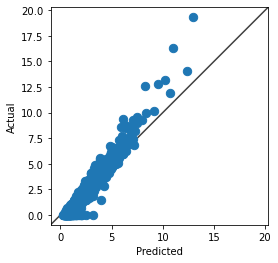

In [270]:
fig,ax = plt.subplots()
ax.scatter(x = (rf_model.predict(X_train2)), y = (y_train), s = 70)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

from sklearn.linear_model import LinearRegression

'''
x = pd.DataFrame(rf_model_optimized.predict(select_relevant(X_train)))
y = pd.DataFrame(logtrain)

lm = LinearRegression().fit(x, y)

lm.coef_, lm.intercept_
'''

(array([[1.24626545]]), array([-0.22033675]))

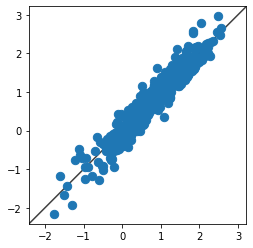

In [194]:
fig,ax = plt.subplots()
ax.scatter(x = 1.246*(rf_model_optimized.predict(select_relevant(X_train))) - 0.22, y = (logtrain), s = 70)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

from sklearn.linear_model import LinearRegression


x = pd.DataFrame(rf_model_optimized.predict(select_relevant(X_train)))
y = pd.DataFrame(logtrain)

lm = LinearRegression().fit(x, y)

lm.coef_, lm.intercept_


In [76]:
#Define urban locations

bigcities = data.loc[data["state"] != "WI",]
bigcities.head()

pd.value_counts(bigcities["state"])

NY    175
TX     66
IL     57
Name: state, dtype: int64

In [77]:
#Split urban locations

cityb = bigcities.set_index('Zipcode')
print(np.shape(cityb))
idx = np.r_[0:(np.shape(cityb)[1] - 5), -4]

print(idx)

cityc = cityb.iloc[:,idx]

cityfeatures = cityc.iloc[:,:-1]
citylabels = cityc.iloc[:,-1:]

cityX_train, cityX_test, cityy_train, cityy_test = train_test_split(cityfeatures, citylabels, test_size = 0.2, random_state = 0)

(298, 54)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 -4]


In [158]:
cityX_train = select_relevant(X_train[X_train.loc[:,"state"] != "WI"])
cityX_test = select_relevant(X_test[X_test.loc[:,"state"] != "WI"])

cityy_train = y_train[X_train.loc[:,"state"] != "WI"]
cityy_test = y_test[X_test.loc[:,"state"] != "WI"]

logcitytrain = np.log(cityy_train)
logcitytest = np.log(cityy_test)

In [159]:
#Tune RF for cities only
city_hyperparam_tuning = optimize_rf2(cityX_train, logcitytrain, random_grid = random_grid)

Fitting 25 folds for each of 10 candidates, totalling 250 fits


In [160]:
rf_model_city_only = rfr_default(cityX_train, logcitytrain)

rf_model_city_optimized = rfr_custom(cityX_train, logcitytrain, city_hyperparam_tuning.best_params_)

In [162]:
#Training error
train_error = abs(np.exp(rf_model_city_only.predict(cityX_train)) - np.exp(logcitytrain))
train_error_opt = abs(np.exp(rf_model_city_optimized.predict(cityX_train)) - np.exp(logcitytrain))
#Test error
test_error = abs(np.exp(rf_model_city_only.predict(cityX_test)) - np.exp(logcitytest))
test_error_opt = abs(np.exp(rf_model_city_optimized.predict(cityX_test)) - np.exp(logcitytest))

median = np.median(cityy_train)
baseline_pred = np.repeat(median, len(cityy_test))
baseline_test_error = abs(baseline_pred - cityy_test)
                          
print(np.mean(baseline_test_error))

print(np.mean(train_error))

print(np.mean(train_error_opt))

print(np.mean(test_error))

print(np.mean(test_error_opt))

1.303151438336807
0.31433056138689075
0.39087679113443646
0.9560265424667646
0.9308141153413442


In [257]:
citycors = bigcities.corr().abs()
cityhighcors = citycors[citycors>0.3]
cityfeature_importance = round(cityhighcors,2).dropna(subset=['Death Counts(Per 1000)'])['Death Counts(Per 1000)'].to_frame().reset_index()
citycors
cityfeature_importance

important_features = bigcities.loc[:,list(cityfeature_importance.loc[:,"index"])[:-4]]
important_features.head()

,Zipcode,Median age,18 to 64(%),65 and over(%),White(%),Per capita income (USD),Median household income (USD),Below poverty line(%),Mean travel time to work (Minutes),Public Transit (%),Worked at home (%),Moved Since Prev Year(%),Same House Prev Year(%),No Degree(%),High School(%),Bachelor's(%),Post-grad(%),Foriegn Born Population(%)
0,60647,32.2,75.14,7.30,48.50,51166.0,82433.0,12.61,33.43,32.92,11.99,18.80,81.20,9.89,17.45,35.73,21.65,17.10
1,60639,34.6,62.24,11.47,8.07,21614.0,51810.0,17.35,38.62,17.40,3.39,9.20,90.80,31.66,30.62,9.32,4.24,32.87
2,60707,40.0,63.60,15.33,46.85,31849.0,64790.0,6.84,35.05,10.59,4.32,8.15,91.85,14.20,27.50,16.73,11.11,26.15
3,60622,32.2,79.84,6.75,64.44,67985.0,106128.0,9.49,31.37,30.29,14.08,20.97,79.03,5.83,9.62,44.90,26.79,13.30
4,60651,33.9,61.38,12.25,5.00,19526.0,41107.0,25.19,37.46,19.72,3.65,9.90,90.10,21.89,34.41,8.03,5.19,13.92


In [207]:
citycors

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000)
Zipcode,1.000000,0.213951,0.298397,0.256393,0.061546,0.239481,0.257057,0.257057,0.069479,0.100154,...,0.260930,0.228724,0.111757,0.099124,0.314286,0.075765,0.421793,0.429363,0.304896,0.178518
Population,0.213951,1.000000,0.195675,0.205338,0.115801,0.095535,0.135402,0.135402,0.206146,0.163112,...,0.075207,0.073396,0.059825,0.141407,0.107283,0.209609,0.792375,0.203315,0.935733,0.129243
Median age,0.298397,0.195675,1.000000,0.292296,0.321934,0.839770,0.200024,0.200024,0.261390,0.030374,...,0.348729,0.214882,0.083798,0.087632,0.299197,0.053365,0.045525,0.367309,0.179085,0.029550
Under 18(%),0.256393,0.205338,0.292296,1.000000,0.737245,0.215235,0.031008,0.031008,0.480406,0.170879,...,0.403462,0.422004,0.124036,0.385693,0.540767,0.414841,0.218127,0.156632,0.258176,0.102213
18 to 64(%),0.061546,0.115801,0.321934,0.737245,1.000000,0.501109,0.179880,0.179880,0.299889,0.162122,...,0.172581,0.253482,0.079247,0.483388,0.322535,0.438367,0.277739,0.438592,0.165888,0.043316
65 and over(%),0.239481,0.095535,0.839770,0.215235,0.501109,1.000000,0.299770,0.299770,0.181860,0.015467,...,0.267353,0.174157,0.044328,0.204696,0.226481,0.102192,0.122174,0.433404,0.090787,0.068238
Male(%),0.257057,0.135402,0.200024,0.031008,0.179880,0.299770,1.000000,1.000000,0.097876,0.477019,...,0.036411,0.059034,0.309221,0.034822,0.045073,0.033410,0.215840,0.229992,0.066906,0.205352
Female(%),0.257057,0.135402,0.200024,0.031008,0.179880,0.299770,1.000000,1.000000,0.097876,0.477019,...,0.036411,0.059034,0.309221,0.034822,0.045073,0.033410,0.215840,0.229992,0.066906,0.205352
White(%),0.069479,0.206146,0.261390,0.480406,0.299889,0.181860,0.097876,0.097876,1.000000,0.566363,...,0.810342,0.448049,0.211484,0.339608,0.736315,0.357481,0.345347,0.392934,0.237832,0.102467
Black(%),0.100154,0.163112,0.030374,0.170879,0.162122,0.015467,0.477019,0.477019,0.566363,1.000000,...,0.361100,0.397250,0.526252,0.154506,0.372978,0.140197,0.259368,0.270387,0.083424,0.186390


In [305]:
xp = np.array(X_train)

SC = StandardScaler()
xp = SC.fit_transform(xp)

xptest = np.array(X_test)
xptest = SC.transform(xptest)


pca = PCA(n_components = len(xp[1]))

PCtrain = pca.fit_transform(xp)
PCtest = pca.transform(xptest)

transformed_train = pd.DataFrame(data=PC)
transformed_test = pd.DataFrame(PCtest)

#print(y_train.reset_index)
finalDF = principalDF
finalDF[['Death Counts(Per 1000)']] = y_train.reset_index()[['Death Counts(Per 1000)']]
finalDF

PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)

components = X_train.columns.tolist()
loadingdf=pd.DataFrame(PCloadings)
loadingdf["variable"] = components
loadingdf


#y_train[['Death Counts(Per 1000)']]
#y_train.reset_index()

print(transformed_train)

           0         1         2         3         4         5         6   \
0   -0.310937 -0.206248  0.543863 -1.503565 -1.295319  0.275584 -0.259282   
1   -2.927952  0.502703 -0.597843 -1.043440  0.289090 -0.072969 -1.118910   
2    2.979078  0.935313 -3.936339  1.027391  1.327786  2.897709 -2.436547   
3   -2.173292  1.438669 -0.989742 -1.163106  0.875424 -0.411637 -0.185503   
4   -2.210375 -1.707236 -0.742552 -1.653903  0.058487 -0.448434  0.912920   
..        ...       ...       ...       ...       ...       ...       ...   
835 -2.041743 -1.330575  0.563205 -0.468219  0.517602 -0.173110  1.075418   
836 -2.489899  0.705844 -1.412519 -1.560717  0.124196 -1.090989  1.296255   
837 -2.418007 -0.654132 -0.223703 -1.395010 -2.056026 -0.446200 -1.021926   
838 -2.164083  0.803587 -2.461966 -2.953436 -1.312368  2.441429 -0.791436   
839 -1.867490  1.443560 -2.262616 -1.208456 -0.646962 -1.287842 -0.499402   

           7         8         9   ...        38        39        40  \
0  

In [306]:
baseline_pred = np.repeat(median, len(y_test))
baseline_test_error = abs(baseline_pred - y_test.loc[:,"Death Counts(Per 1000)"])
print("Baseline: ", np.mean(baseline_test_error))

for i in range(2,48):
    
    pc_rf_model = rfr_default(transformed_train.iloc[:,0:i], y_train.loc[:,"Death Counts(Per 1000)"])


    #Training error
    train_error = abs(pc_rf_model.predict(transformed_train.iloc[:,0:i]) - y_train.loc[:,"Death Counts(Per 1000)"])
    #Test error
    test_error = abs(pc_rf_model.predict(transformed_test.iloc[:,0:i]) - y_test.loc[:,"Death Counts(Per 1000)"])

    median = np.median(y_train.loc[:,"Death Counts(Per 1000)"])
    
    print(i, " components:")

    print(np.mean(train_error))

    print(np.mean(test_error))



Baseline:  1.3567209435389411
2  components:
0.5442852975144905
1.3894570514528044
3  components:
0.5099284001051654
1.2829513960663677
4  components:
0.4427676919645264
1.3003416011331603
5  components:
0.44505254703633346
1.3218673603954127
6  components:
0.43554529827830285
1.2716542232803683
7  components:
0.43308582466667017
1.258791365897941
8  components:
0.4322336009808769
1.2823520902552505
9  components:
0.436892481745111
1.264668423021018
10  components:
0.439857186222176
1.2635774654963803
11  components:
0.4377331989977287
1.2581753868626364
12  components:
0.43735759167586435
1.2618822780504582
13  components:
0.44349174274000613
1.2743354268801197
14  components:
0.44183917399855566
1.2696104268455604
15  components:
0.44358308519645384
1.2624103044098007
16  components:
0.44542582878527925
1.2480739398051623
17  components:
0.4453116302715897
1.2442084693996254
18  components:
0.44486088567568033
1.2425976391934341
19  components:
0.44634356964389205
1.2540413780981692


KeyboardInterrupt: 

In [249]:


rf_model_city_only = rfr_default(cityX_train, cityy_train.loc[:,"Death Counts(Per 1000)"])

rf_model_city_optimized = rfr_custom(cityX_train, cityy_train.loc[:,"Death Counts(Per 1000)"], city_hyperparam_tuning.best_params_)

#Training error
train_error = abs(rf_model_city_only.predict(cityX_train) - cityy_train.loc[:,"Death Counts(Per 1000)"])
train_error_opt = abs(rf_model_city_optimized.predict(cityX_train) - cityy_train.loc[:,"Death Counts(Per 1000)"])
#Test error
test_error = abs(rf_model_city_only.predict(cityX_test) - cityy_test.loc[:,"Death Counts(Per 1000)"])
test_error_opt = abs(rf_model_city_optimized.predict(cityX_test) - cityy_test.loc[:,"Death Counts(Per 1000)"])

median = np.median(cityy_train.loc[:,"Death Counts(Per 1000)"])
baseline_pred = np.repeat(median, len(cityy_test))
baseline_test_error = abs(baseline_pred - cityy_test.loc[:,"Death Counts(Per 1000)"])
                          
print(np.mean(baseline_test_error))

print(np.mean(train_error))

print(np.mean(train_error_opt))

print(np.mean(test_error))

print(np.mean(test_error_opt))

print(0.79/1.455)
      
print(0.62/1.02)

1.455392019509969
0.32852118506393635
0.544292251809652
0.8480333896545471
0.7945212569050812
0.5429553264604811
0.6078431372549019


In [339]:
data_zipind = data.set_index("Zipcode")
lopop_X_train = X_train[data_zipind.loc[:,"Population"] < 20000]
hipop_X_train = X_train[data_zipind.loc[:,"Population"] >= 20000]

lopop_y_train = y_train[data_zipind.loc[:,"Population"] < 20000]
hipop_y_train = y_train[data_zipind.loc[:,"Population"] >= 20000]


lopop_X_test = X_test[data_zipind.loc[:,"Population"] < 20000]
hipop_X_test = X_test[data_zipind.loc[:,"Population"] >= 20000]

lopop_y_test = y_test[data_zipind.loc[:,"Population"] < 20000]
hipop_y_test = y_test[data_zipind.loc[:,"Population"] >= 20000]


C:\Users\fanta\AppData\Local\Temp/ipykernel_23780/2953148279.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lopop_X_train = X_train[data_zipind.loc[:,"Population"] < 20000]
C:\Users\fanta\AppData\Local\Temp/ipykernel_23780/2953148279.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hipop_X_train = X_train[data_zipind.loc[:,"Population"] >= 20000]
C:\Users\fanta\AppData\Local\Temp/ipykernel_23780/2953148279.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lopop_y_train = y_train[data_zipind.loc[:,"Population"] < 20000]
C:\Users\fanta\AppData\Local\Temp/ipykernel_23780/2953148279.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hipop_y_train = y_train[data_zipind.loc[:,"Population"] >= 20000]
C:\Users\fanta\AppData\Local\Temp/ipykernel_23780/2953148279.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lopop_X_test 

In [340]:
rf_model_lopop = rfr_default(lopop_X_train, lopop_y_train.loc[:,"Death Counts(Per 1000)"])

#Training error
train_error = abs(rf_model_lopop.predict(lopop_X_train) - lopop_y_train.loc[:,"Death Counts(Per 1000)"])
#train_error_opt = abs(rf_model_city_optimized.predict(cityX_train) - cityy_train.loc[:,"Death Counts(Per 1000)"])
#Test error
test_error = abs(rf_model_lopop.predict(lopop_X_test) - lopop_y_test.loc[:,"Death Counts(Per 1000)"])
#test_error_opt = abs(rf_model_city_optimized.predict(cityX_test) - cityy_test.loc[:,"Death Counts(Per 1000)"])

median = np.median(lopop_y_train.loc[:,"Death Counts(Per 1000)"])
baseline_pred = np.repeat(median, len(lopop_y_test))
baseline_test_error = abs(baseline_pred - lopop_y_test.loc[:,"Death Counts(Per 1000)"])
                          
print(np.mean(baseline_test_error))

print(np.mean(train_error))

print(np.mean(test_error))


1.4610967473000014
0.523638787557036
0.544292251809652
1.4122879069263874
